# 0. Recap

딥러닝 코드라는게 사람마다 쓰는 방식이 너무달라서 코드를 한줄 한줄 의미를 다 '알고' 쓰기 어렵습니다. 대략적인 구조가 어떻게 잡혀있고, 어떻게 쓰는 것인지를 알고나서, 자세한 사용 방식은 **문서화 되어있는 것을 검색해서 알아보는 수 밖에 없는 때<sup>[1](#footnote_1)</sup>**도 있습니다.

그래서 기본적으로 여러분이 다른 사람이 써놓은 딥러닝 모델 코드를 이해하거나, 수업을 이해할때 취해야하는 전략은 다음과 같습니다.

>이론에 대한 내용으로 바탕으로 신경망을 만들어 문제를 해결한다.




<a name="footnote_1">1</a>: 이전 버전으로 쓰인 경우, 특히 텐서플로의 경우 0.X 1.X 버전으로 쓰인 경우 함수가 있다가 사라진게 좀 많습니다. 함수의 위치가 바뀐 경우도 있고, 다른 라이브러리로 독립된 경우, 합쳐진 경우.. 대표적으로 tf.contrib 는 2.X 버전에서 삭제됐습니다. 이래서 pytorch 를 쓰는 것도 있어요. 많이 사라지지 않거나 크게 변화가 없었기 때문에 과거의 코드를 그대로 쓸 수 있습니다 (대부분)

해야되는거 여러가지 있지만...

아래와 같은 내용은 필수적으로 알고 있어야 합니다.

0.1. 모델 정의 및 업데이트 하는 방법
  - pytorch 모델 정의
  - pytorch 모델 업데이트

0.2. MLP에서
  - 신경망의 4 요소
    - 데이터 및 데이터 처리
    - 신경망의 구조
    - 손실함수
    - 최적화 방법
  - vanishing gradient?
  - overfitting



## 0.1. 파이토치

파이토치는 CPU도 사용하지만, 기본적으로 GPU를 활용하기 위한 툴입니다.

과거에는 우리가 GPU에서 복잡한 연산을 하기 위해서 보통 C++로 되어있는 NVIDIA의 그래픽카드 (GPU) 드라이버를 활용하여 코딩을 했었습니다. 텐서플로우는 이걸 우리가 다루기 쉬운 언어인 '파이썬'으로 Wrapper function 으로 만들어 놓은 라이브러리입니다.

wrapper function? 다른 라이브러리/소프트웨어의 함수를 호출하는 함수를 말합니다. 여기서는 *GPU를 구동하는 C++ 라이브러리*가 있고, 그걸 pytorch 에서 함수로 적절하게 만들어서 구동시키도록 짜여있다는 말입니다.

상황이 이렇다보니 텐서플로우 0.X 버전과 1.X 버전에서 돌리는 방식이 진짜 개판이었습니다. GPU 메모리에 돌려야하는 거다 보니까... 그러나 파이토치는 이런 상황이 조금 낫습니다. 코드가 그렇게 어렵지 않은 편이에요!


### 그 외

제가 그 외에 사용할법한 기술들로 `model.save()`로 모델저장하는 법, hidden activity 저장하는법, weights 저장하는법 등등이 적혀있었습니다. 확인해보세요!


# 모델의 성능을 실시간으로 확인하는 방법

그 외 중에서도 중요한것은 모델의 성능을 실시간으로 확인하는 방법입니다. 크게 2가지를 사용합니다.

1) tensorboard라는 라이브러리를 사용하여 확인합니다.

2) wandb라는 라이브러리를 사용하여 확인합니다.

## 1) tensorboard

여기서는 colab에서 / jupyter notebook 상에서 확인하는 방법을 작성해두었습니다. (2023.10: 크롬에서는 왠지 모르게 안될때가 있음)

그러나 요즘은 wandb를 많이 쓰므로 자세히 설명하지 않겠습니다. 그냥 이런 방법이 있다 - 정도.

`%load_ext tensorboard`

```
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'

# writer: 이게 실제로 파일을 저장하고 써주는 부분입니다.
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)
```

```
%tensorboard --logdir logs
```

## 2) wandb 사용하는 방법

먼저 wandb 에 가입하고 api key를 발급받습니다.

그리고 모델을 실행할때 `wandb.log({'기록할것이름':기록할것변수명})`과 같은 식으로 저장할 수 있습니다. 그러면 인터넷을 통해 업로드 되고 - 직접 wandb 에서 확인할 수 있습니다.



In [1]:
!pip install wandb

In [2]:
!wandb login

wandb: Currently logged in as: dongjaekim (hails). Use `wandb login --relogin` to force relogin


In [3]:
import wandb
# wandb.init(project='OSAIA', name='my_first_run') # 이걸 실행하면 기록이 시작됩니다/
# wandb.log({'episode':1}) # 이런식으로 찍으면 episode라는 변수가 1 로 기록됩니다.

# 2. Convolutional neural network

# 2.1. 아주아주 간단한 CNN 만들기


In [4]:
import torch
from torch import nn
import torch.nn.functional as F

In [5]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Define the first convolution layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), padding=1)

    # Define the second convolution layer
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)

    self.pool = nn.MaxPool2d(kernel_size=(2, 2))


    # Fully connected layers
    self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 64 channels * 7x7 feature map size
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
      # Apply the first convolution, activation, and pooling
      x = self.pool(F.relu(self.conv1(x)))

      # Apply the second convolution, activation, and pooling
      x = self.pool(F.relu(self.conv2(x)))

      x = x.view(-1, 64 * 7 * 7)

      x = F.relu(self.fc1(x))
      x = self.fc2(x)


      return F.softmax(x, dim=1)


In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

In [7]:
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Transform to convert images to PyTorch tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)

# Create a DataLoader for the training data
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Load the MNIST test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

# Create a DataLoader for the test data
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:03<00:00, 2.99MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 144kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.39MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.23MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
wandb.init(project='osai', name='CNN', entity='dongjaekim')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: dongjaekim. Use `wandb login --relogin` to force relogin


In [ ]:
num_epochs = 50  # You can adjust this

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for i, data in enumerate(trainloader, 0):
      # Get the inputs; data is a list of [inputs, labels]
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)

      # Compute the loss
      loss = criterion(outputs, labels)

      # Backward pass and optimize
      loss.backward()
      optimizer.step()

      # Accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

      # log loss
      wandb.log({'train/loss':loss.item(), 'train/acc':correct/total})

      # Print statistics
      running_loss += loss.item()
      if i % 100 == 99:    # Print every 100 mini-batches
          print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
          running_loss = 0.0

  model.eval()
  with torch.no_grad():
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(testloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

        # log loss
        wandb.log({'test/loss':loss.item(), 'test/acc':correct/total})

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Test Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0


print('Finished Training')
wandb.finish()


Epoch 1, Batch 100, Loss: 2.3678671503067017
Epoch 1, Batch 200, Loss: 2.357088384628296
Epoch 1, Batch 300, Loss: 2.363025884628296
Epoch 1, Batch 400, Loss: 2.365994634628296
Epoch 1, Batch 500, Loss: 2.3617758846282957
Epoch 1, Batch 600, Loss: 2.362400884628296
Epoch 1, Batch 700, Loss: 2.359119634628296
Epoch 1, Batch 800, Loss: 2.359900884628296
Epoch 1, Batch 900, Loss: 2.363338384628296
Test Epoch 1, Batch 100, Loss: 4.7341767692565915
Epoch 2, Batch 100, Loss: 2.3661508846282957
Epoch 2, Batch 200, Loss: 2.365369634628296
Epoch 2, Batch 300, Loss: 2.359900884628296
Epoch 2, Batch 400, Loss: 2.360682134628296
Epoch 2, Batch 500, Loss: 2.3631821346282957
Epoch 2, Batch 600, Loss: 2.369275884628296
Epoch 2, Batch 700, Loss: 2.355213384628296
Epoch 2, Batch 800, Loss: 2.3636508846282958
Epoch 2, Batch 900, Loss: 2.359119634628296
Test Epoch 2, Batch 100, Loss: 4.7341767692565915
Epoch 3, Batch 100, Loss: 2.360838384628296
Epoch 3, Batch 200, Loss: 2.363963384628296
Epoch 3, Batch 

test/acc,▄▅▅▆▇██▄▇▇▇▇▇▇▇██▄▅▅▆▆▇▇▇▁▃▃▆▇▇▇███▅▇▇▇█
test/loss,▆▂▅▅▆▄▅▂▅▅▇▄▄▄▅▃▃▄▅▂▁▇▅▅▃▃█▅▃▃▆▅▆▅▅▅▄▅▂▃
train/acc,▃▆▇▇▇▇▅▂▁▅▆▆▆▇▇▇▇▇▇▆▆▇▇████▇▇█▅▅▃▃▄▆▆▆▆▆
train/loss,▃▆▄▆▇▇▅▄▅▅▅▅▃▆▂▇▇▆▆▅▄▆▅▅▄▅▁▅▄▆▅▃▆▆█▆▅▅▆▄
test/acc,0.0958
test/loss,2.33615
train/acc,0.09863
train/loss,2.3049


### batch normalization 하고 싶어요

다른 테크닉 (드랍아웃)은 그냥 하면됩니다. 근데 batch normalization 은 conv 다음에 해야할지, maxpool 다음에 해야할지 헷갈리죠. conv 다음에 하시면됩니다.

### Kaggle 데이터에다가 하고 싶어요

In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="yourusername"
os.environ["KAGGLE_KEY"]="yourapikey"

In [13]:
!kaggle competitions download -c osai-project
!unzip osai-project.zip

osai-project.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  osai-project.zip
replace solution_sample.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [14]:
import pandas as pd # csv 등 테이블 형태의 데이터를 처리하기 좋은 library

train = pd.read_csv('./train/text_label.csv')
test  = pd.read_csv('./test/text_label.csv')
val   = pd.read_csv('./val/text_label.csv')
sol   = pd.read_csv('./solution_sample.csv')

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
from tqdm import tqdm, trange
import numpy as np
to_tensor = ToTensor()
to_pil    = ToPILImage()


# 데이터셋을 불러오는 구조 만들기
class KaggleDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): Contains 'img', 'text', and 'label' columns.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.dataframe = dataframe
        self.transform = transform if transform else ToTensor()

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['img']
        text = self.dataframe.iloc[idx]['text']
        label = self.dataframe.iloc[idx]['label']

        # Load image and apply transform
        image = Image.open(img_path).convert("RGB")  # Ensure it's 3 channels
        image = self.transform(image)

        return image, text, label
    
# 데이터 불러오기
train_dataset = KaggleDataset(dataframe=train)  # 이미지 텍스트 레이블 칼럼 불러오는 데이터세트로 구성 데이터로더로 잘 받을 수 있는 형태
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)  # 데이터로더로 만들어서 필요할떄 하나씩 불러오도록

test_dataset = KaggleDataset(dataframe=test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

val_dataset = KaggleDataset(dataframe=val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


이전 신경망을 그대로 돌리면 flatten 하면서 shape 이 달라질 수 있습니다.

그래서 그대로 쓰면 안되고, 크기를 잘 맞춰서 넣어줘야 합니다.

원본 이미지의 크기를 프린트해봅시다.

In [16]:
data, _, label = train_dataset.__getitem__(0) # 가운데 출력값은 의미가 없다면 이런식으로 _ 로 쓰면 됩니다. 메모리에 올라가지 않습니다.
print(data.shape) # (channel 갯수, height, width) 형태로 출력됩니다. 

torch.Size([3, 64, 64])


```python
    # Define the first convolution layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), padding=1)

    # Define the second convolution layer
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)

    self.pool = nn.MaxPool2d(kernel_size=(2, 2))
```

가장먼저 해야하는 건 입력 채널을 변경시키는 것 입니다 `in_channels=3` 으로 바꾸어 줘야합니다.

`self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)`


원래의 CNN 에서 보면 conv 는 `kernel_size=(3,3)`이고, `padding=1` 입니다. 

이런 경우, conv 연산을 했을때 feature map 의 사이즈는 작아지지 않습니다. 

다만 pooling 은 `kernel_size=(2,2)`이고, `stride` 은 default 값이기 때문에 `1`이 됩니다. 

원래 `(3,64,64)` 였던 이미지는 `self.conv1` 를 거치면서 `(32,64,64)` 가 되고

(`relu`의 경우는 Tensor의 사이즈를 변경하지 않으므로) `self.pool`의 연산을 수행하면서 피쳐맵의 사이즈가 변하게 됩니다.

이를 그림을 그리면서 고민해볼 수도 있고, 계산하는 공식을 통해서 다음의 shape을 어렵지않게 예측해볼 수 있습니다.


그렇지만 이런거 하기 귀찮을 수 있죠? 그럼 간단하게 다음과 같이 만들어서 해봐도 됩니다.

In [17]:
x = torch.rand((1,3,64,64))
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)
pool  = nn.MaxPool2d(kernel_size=(2, 2))

x = pool(F.relu(conv1(x)))
print('conv1_pool:', x.shape)
x = pool(F.relu(conv2(x)))
print('conv2_pool:', x.shape) # (1, 64, 16, 16) 이므로 64 개 채널을 갖는 16x16 크기의 피쳐맵이라는 것을 알 수 있음.



conv1_pool: torch.Size([1, 32, 32, 32])
conv2_pool: torch.Size([1, 64, 16, 16])


conv2 를 지났을때 피쳐맵의 크기는 `(64,16,16)` 이므로, 이를 flatten 해서 벡터로 만들어서 MLP 에 넣는 부분을 구현해야합니다. 

In [18]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # Define the first convolution layer
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1)

    # Define the second convolution layer
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1)

    self.pool = nn.MaxPool2d(kernel_size=(2, 2))


    # Fully connected layers
    self.fc1 = nn.Linear(64 * 16 * 16, 128)  # 이 부분이 수정되어야합니다.
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
      # Apply the first convolution, activation, and pooling
      x = self.pool(F.relu(self.conv1(x)))

      # Apply the second convolution, activation, and pooling
      x = self.pool(F.relu(self.conv2(x)))

      x = x.view(-1, 64 * 16 * 16)

      x = F.relu(self.fc1(x))
      x = self.fc2(x)


      return F.softmax(x, dim=1)


In [19]:
wandb.init(project='osai', name='cnn_kaggle', entity='dongjaekim')

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

In [22]:
max_epoch = 50 # 50
optmimizer = torch.optim.Adam(model.parameters(), lr=0.001)
ce_loss = nn.CrossEntropyLoss()
for epoch in trange(max_epoch):
    count = 0
    model.train()
    progress_bar = tqdm(train_loader)

    for batch in progress_bar:

        optmimizer.zero_grad()

        images, _, y_true = batch
        
        images = images.to(device)
        y_true = y_true.to(device)

        y_pred = model(images)
        loss = ce_loss(y_pred, y_true)
        loss.backward()

        optmimizer.step()

        # 정확도 계산
        accuracy = (y_pred.argmax(dim=1) == y_true).float().mean()
        count += 1

        # log loss
        wandb.log({'train/loss':loss.item(), 'train/acc':accuracy})
        
        progress_bar.set_description(f"TRAIN {count} - Accuracy: {accuracy:.4f}")

    # evaluation data
    count = 0
    model.eval()
    progress_bar = tqdm(val_loader)
    for batch in progress_bar:
        images, texts, y_true = batch

        images = images.to(device)
        y_true = y_true.to(device)

        y_pred = model(images)
        loss = ce_loss(y_pred, y_true)

        accuracy = (y_pred.argmax(dim=1) == y_true).float().mean()
        count += 1
        # log loss
        wandb.log({'test/loss':loss.item(), 'test/acc':accuracy})

        progress_bar.set_description(f"EVAL {count} - Accuracy: {accuracy:.4f}")

100%|██████████| 50/50 [03:08<00:00,  3.77s/it]


# Advanced convolutional neural network

Convolutional neural network 가 어떻게 구성되는지는 대충 이해하셨나요? 이 convolutional neural network 라는 개념은 동일하게 활용하되, 구성이 다른 네트워크들이 여럿 있습니다.

똑같이 '신발' 이라고 분류되어도 운동화, 구두 이런 것들이 다양하게 존재할수 있는 것처럼, 다양한 변형형태가 존재합니다.

특정 문제를 풀기 위해서 어떤 논문에서 CNN 구조를 제안하고, 그 구조에 이름을 붙이곤 했습니다.

대표적으로 자주 쓰이는 CNN 들은

- LeNet: DL 분야, 특히 CNN 에서 유명한 Yann LeCun이 자기 이름 따서 붙인 'Le'Cun's network.

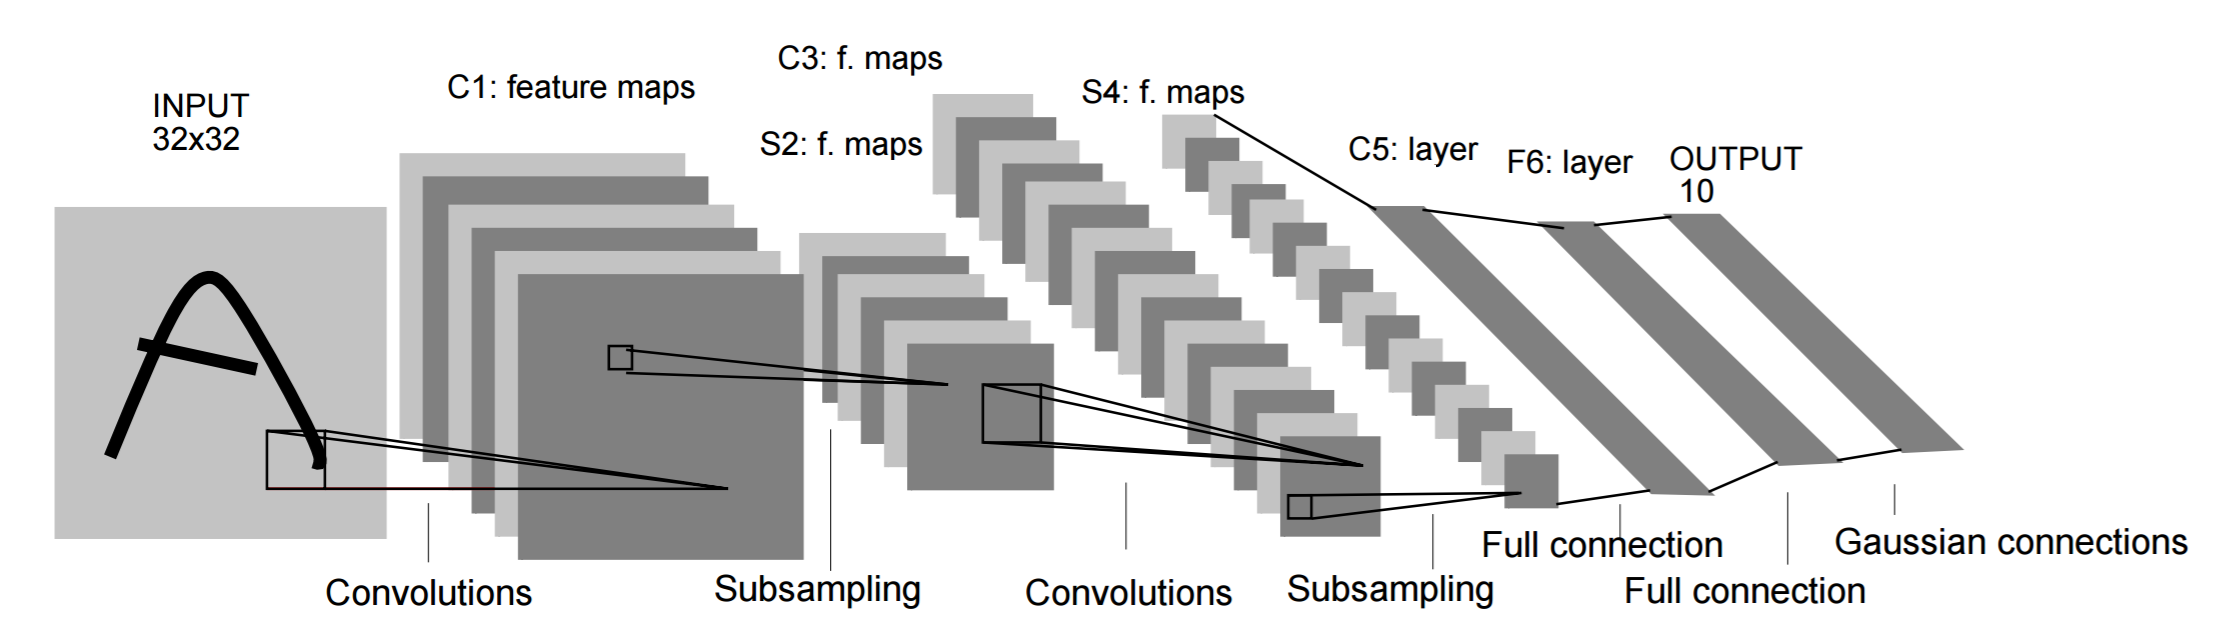

- AlexNet: 역시 저자이름 따라서 붙여졌습니다. MNIST 보다 더 복잡한 문제 (ImageNet 데이터 (224,224,3) 크기의 데이터)를 풀기 위해서 네트워크가 커지면서 GPU 한개에서 처리되는 양에 한계가 있다보니까 GPU 두개로 쪼개서 했다, 즉 네트워크가 1개가 아니라 2개로 구분되어있다 말고는 특이점은 없습니다.

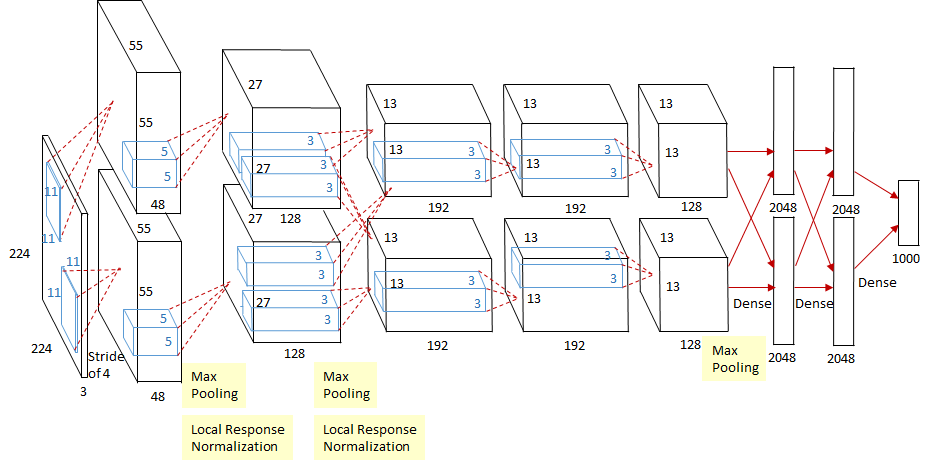


- ResNet: Residual connection 이라는 새로운 아이디어를 접목한 CNN 네트워크. 네트워크 layer가 너무 깊어지면 ReLU 쓰고 나발이고 Vanishing gradient 생기더라... 그래서 residual connection 만듦 (간단하게만 설명할게요)

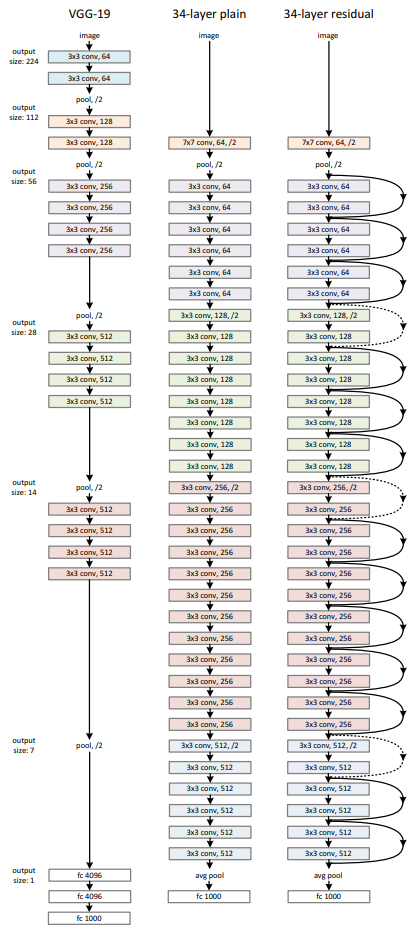

## Res Net

ResNet 은 더 더 더 복잡한 데이터를 학습시키려고 더 더 더 깊은 네트워크를 쌓으면, 네트워크가 학습이 안되는 것 때문에 개발되었습니다.

여기서 핵심 아이디어는 Residual connection 이라는 건데요,

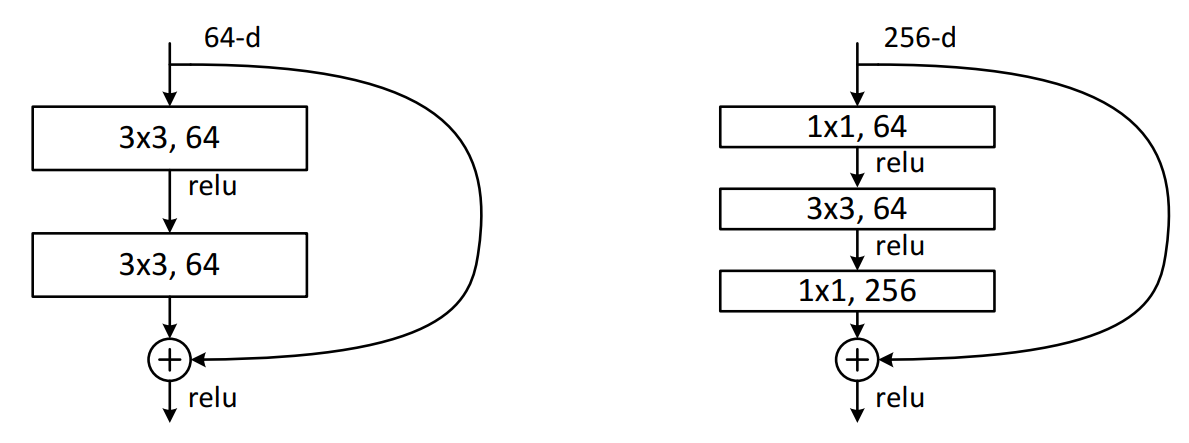

위와 같은 방식으로 이전 layer 의 아웃풋을 저 멀리 있는 layer 에다 ***더해*** 주는 겁니다. 물론 덧셈이기 때문에 사이즈는 같아야 해요


이것의 장점은 backpropagation 으로 저 화살표의 반대방향으로 간다고 생각해보시면 알 수 있습니다.

보면 이렇게 residual 로 오는게 있고 convolution layer를 두번 (좌측) 또는 세번 (우측) 거쳐오는게 있는데요, 이게 backpropagation 으로 가면  conv를 거쳐온쪽의 gradient + residual connection 으로 오는 gradient 로 구성되어있는 상태인거죠.

이런 residual connection 이 덧셈으로 구성되어있어서 layer 2개만큼 gradient 가 vanishing 하지 않고,  2layer 이전의 상태로 직접적으로 gradient 가 전달될 수 있습니다.

gradient vanishing 을 '근본적으로' 해결할 수 있는 모델이라 CNN 말고 이런 residual connection (MLP에 쓸때는 skip connection 이라는 말도 쓰더라구요?) 은 다른 MLP와 같은 모델들에도 적용되는 편입니다.

### 그래서 이런 덧셈이 뭐가 좋습니까?
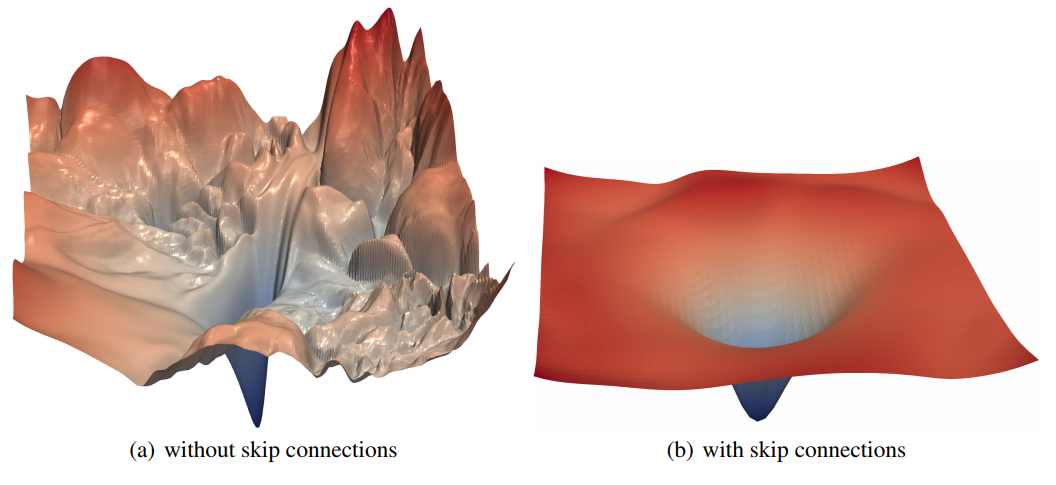






위 처럼 저렇게 loss function 이 부들부들해집니다. 누가 봐도 너무 좋죠? gradient descent 문제도 참 잘 해결합니다. 왜냐면 *덧셈*하기  때문에 직접적으로 이전 layer 로 가거든요.

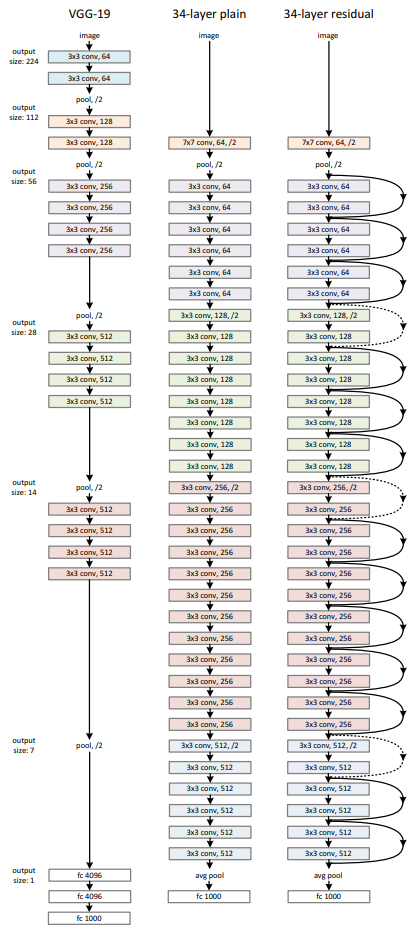


torch 에서는 이런 모델들을 몇가지 만들어놓고, 불러와서 사용할 수 있게합니다.

시각 정보를 처리한다는점에서 비슷하기 때문에, pretraining 된 모델을 불러와서 새로운 task에 새롭게 학습을 시킬 수 있습니다.

이렇게 이미 학습된 (pretrained) 모델을 내가 갖고 있는 데이터 (예: kaggle)에 대해 새롭게 학습을 시키는 것을 미세조정 (finetuning) 이라고 부릅니다.

finetuning 을 하기 위해서는 모델을 불러오고, 학습이 가능하게 만들어줄 뿐만 아니라, 마지막 nn.Linear 의 output size 가 미세조정하고자 하는 class 갯수와 동일하게 변경해줘야합니다.


예를 들어, alexnet 이라는 모델이 pretraining 할때는 클래스 1000개의 데이터에 대해서 학습을 했다고 하면, 마지막 nn.Linear 같은 경우 output size 가 1000이었을 겁니다.

그러나 kaggle 문제에서는 우리가 학습하고자 하는 클래스가 이진 분류의 예시이기 때문에 마지막 nn.Linear 의 output size 를 2로 만들어야합니다.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models # 모델이 구현되어있는 곳 

# 모델 불러오기 (pretrained=True 옵션을 통해 사전 학습된 가중치 불러옴)
alexnet = models.alexnet(pretrained=True)
resnet18 = models.resnet18(pretrained=True) # 이 외에 다른 모델들도 있습니다.

# 모든 파라미터를 미세 조정 가능하게 설정
for param in alexnet.parameters():
    param.requires_grad = True

for param in resnet18.parameters():
    param.requires_grad = True

# AlexNet과 ResNet18의 출력 레이어를 새로운 클래스 수에 맞게 변경
# 예시: 클래스 수가 2개인 경우
num_classes = 2

# 어디를 어떻게 바꿔야하는지는 모델마다 마지막 nn.linear layer 의 인스턴스 이름을 다르게 했을수 있으므로... 잘 알아보고 하세요 (document)
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

# 모델 확인 (선택 사항)
print(alexnet)
print(resnet18)

# 예시 입력 데이터
input_data = torch.randn(1, 3, 224, 224)  # 배치 크기 1, 3 채널, 224x224 이미지 크기

# 예시 forward pass
alexnet_output = alexnet(input_data)
resnet18_output = resnet18(input_data)

print("AlexNet output:", alexnet_output)
print("ResNet18 output:", resnet18_output)
